In [1]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import functools

# Sklearn all
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

In [2]:
# Load data
data = pd.read_csv("/Users/lluisarull/Desktop/DSDM/Machine_Learning/Assignment4/churn_data - churn_data.csv", sep=';')
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00


**1.Exploring and understanding the dataset**

In [3]:
#Data shape
data.shape

(3333, 11)

In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
#Checking for missing values

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data

,Total,Percent
Churn,0,0.00
AccountWeeks,0,0.00
ContractRenewal,0,0.00
DataPlan,0,0.00
DataUsage,0,0.00
CustServCalls,0,0.00
DayMins,0,0.00
DayCalls,0,0.00
MonthlyCharge,0,0.00
OverageFee,0,0.00


We can see there is no null data neither categorical data in the dataset

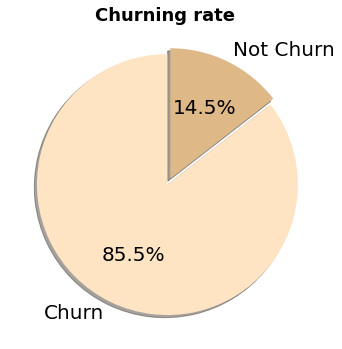

In [6]:
#Ploting the target 
labels = ['Churn', 'Not Churn']
sizes = data['Churn'].value_counts(sort = True)

colors = ["bisque","burlywood"]
explode = (0.05,0) 
 
plt.figure(figsize=(6,6))
plt.suptitle("Churning rate",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})
plt.show()


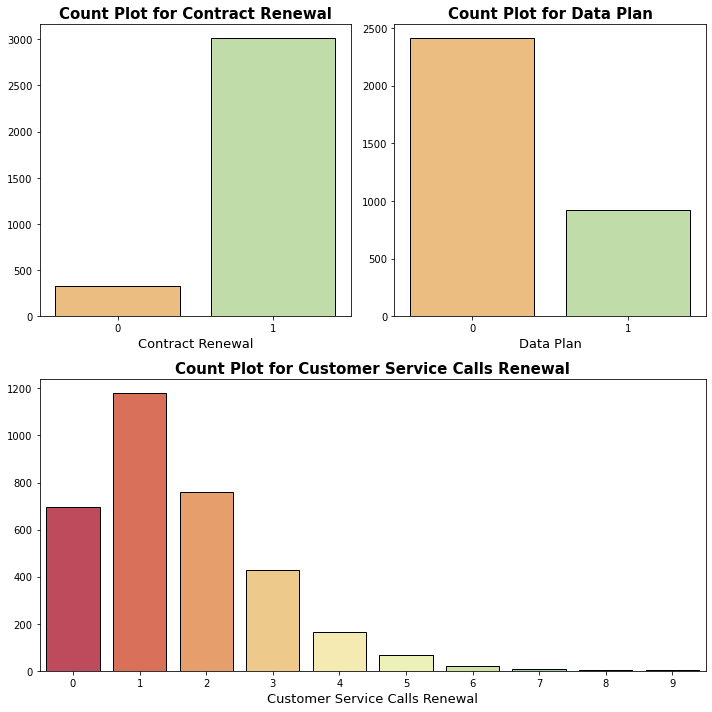

In [8]:
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = data , x = "ContractRenewal" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Contract Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Contract Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,2)
sns.countplot(data = data , x = "DataPlan" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Data Plan" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Data Plan", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,(3,4))
sns.countplot(data = data , x = "CustServCalls" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Customer Service Calls Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Customer Service Calls Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.tight_layout()
plt.show()

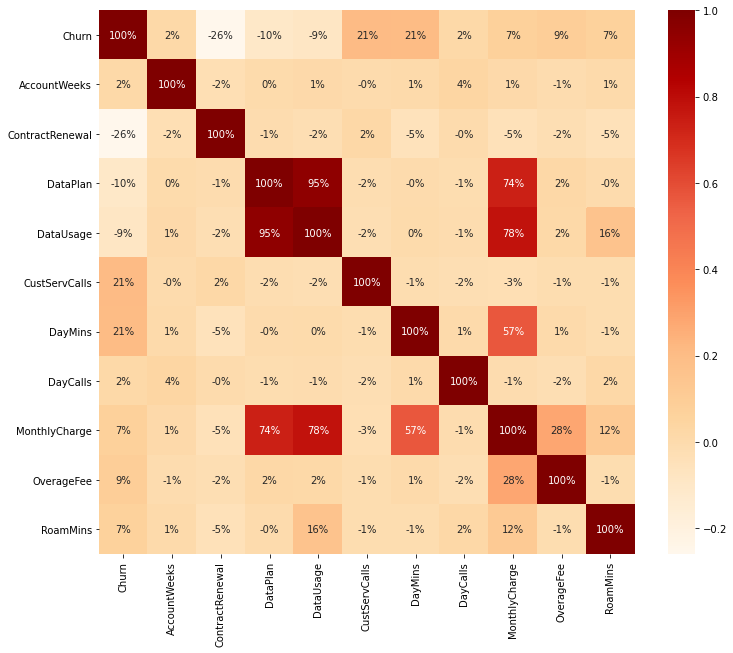

In [9]:
#Correlation map
ax = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="OrRd", fmt='.0%')
plt.show()

In the previous correlation map we are able to see that the probability of churning is negatively correlated with DataUsage and positively correlated with all the other attributes (we are not considering Contract Renewal and Data Plan as they are dummy variables). We have analyzed their impact on churning hereafter.

We are also able to check that DataPlan and DataUsage are highly correlated attributes, and they are also correlated with MonthlyCharge.

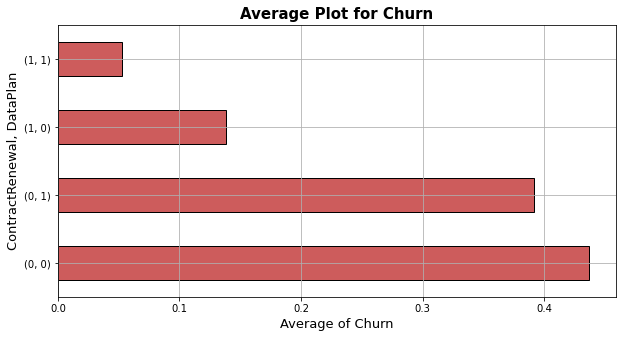

In [10]:
# Contract Renewal and Data Plan impact on Churning Probability
ax = plt.figure(figsize=(10,5))
data.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",color="indianred",
                                                               edgecolor='k')
plt.title("Average Plot for Churn" , size=15, fontweight='bold', fontfamily='sans')
plt.ylabel("ContractRenewal, DataPlan",size=13, fontweight='light', fontfamily='sans')
plt.xlabel("Average of Churn",size=13, fontweight='light', fontfamily='sans')
plt.grid(True)
plt.show()

Contract Renewal and Data Plan are two important attributes when trying to predict customer churn. If a customer has recently renewed a contract and has a data plan, the probability of churning is much more lower than if he/she has not. Moreover, we can also see that having renewed a contract recently has a higher impact on the churning rate than having a data plan.

**2. Build the model and test in the same input data**

First of all, we are going to prepare the data (split the data for train and test). For testing, we choose to split our data to 67% train and 33% for test


In [11]:
# Split data for train and test
X = data.drop('Churn', axis = 1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

**CLASSIFICATION TREE**

In [12]:
#Identifying optimal tree depth (the one which reduces over-fitting while still maintaining good performance of metrics)
L = []
for i in range(1,15):
    clf_tree = DecisionTreeClassifier(max_depth=i)
    clf_tree.fit(X_train,y_train)
    y_pred = clf_tree.predict(X_test)
    L.append(round(accuracy_score(y_test,y_pred),4))
print(L.index(max(L)))
print(max(L))

3
0.91


The optimal tree depth is 3

In [39]:
# Train the model using DecisionTree classifier
clf_tree = DecisionTreeClassifier(max_depth = None, random_state=1)
clf_tree.fit(X_train, y_train)

# Predict test set labels
y_pred = clf_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Now we are going to evaluate the classification tree

In [40]:
# Predict test set labels
y_pred = clf_tree.predict(X_test)
 
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.87


Finally, we are going to plot the tree

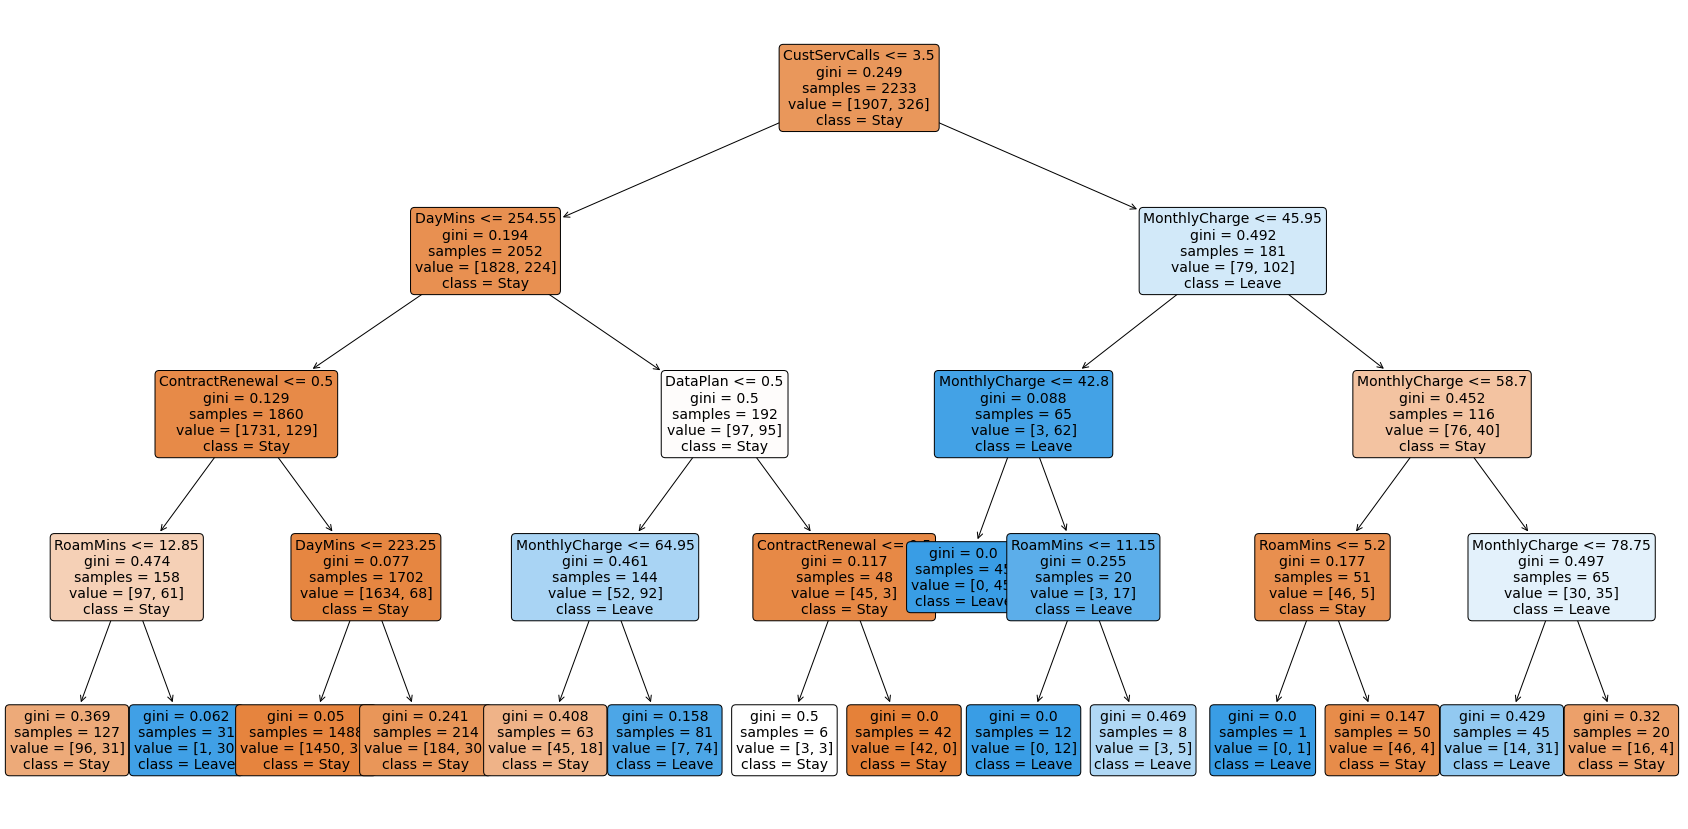

In [15]:
from sklearn.tree import plot_tree
#Ploting the tree
plt.figure(figsize=(30,15))
plot_data = plot_tree(clf_tree,
                      feature_names=X.columns, 
                      class_names={0: 'Stay', 1: 'Leave'}, 
                      filled=True, 
                      rounded=True, 
                      fontsize=14)

Text(42.0, 0.5, 'True')

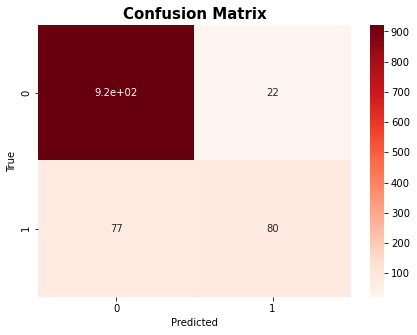

In [16]:
# get an ounderstanding of the wrong predictions
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True, cmap="Reds")
plt.title('Confusion Matrix',size=15, fontweight='bold', fontfamily='sans')
plt.xlabel('Predicted')
plt.ylabel('True')

**RANDOM FOREST CLASSIFIER**

Let’s first fit a Random Forest Classifier with default parameters to get a baseline idea of the performance

In [17]:
# Instantiate rf
rf = RandomForestClassifier(max_depth= None, random_state=1)
             
# Train Random Forest Classifier   
model_rf=rf.fit(X_train, y_train) 
 
# Predict the response for test dataset
y_pred_RF = rf.predict(X_test)
 
# Evaluate acc_test
acc_test_rf = accuracy_score(y_test, y_pred_RF)
print('Test set accuracy of rf: {:.2f}'.format(acc_test_rf)) 

Test set accuracy of rf: 0.94


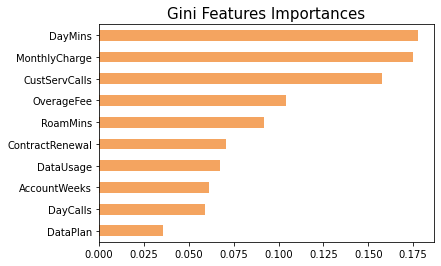

In [18]:
# IMPURITY-BASED FEATURES IMPORTANCE
# Create a pd.Series of features importances
features=['AccountWeeks','ContractRenewal','DataPlan', 'DataUsage',	'CustServCalls', 'DayMins',	'DayCalls',	'MonthlyCharge', 'OverageFee', 'RoamMins']
importances = pd.Series(data=rf.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted = importances.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

Using Random forest algorithm, the feature importance can be measured as the average impurity decrease computed from all decision trees in the forest.
As we can see, DayMins and CustServCalls are the two most important features in the tranining data, so they are the ones with more predictive power of the target variable (whether or not a customer will churn). DayCalls and DataPlan, on the other hand, are consistently ranked as unimportant, meaning that they don't seem to be that relevant in predicting the target variable. 
 

In [21]:
# FEATURES IMPORTANCE BY PERMUTATION
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


In [31]:
curr_feat_1 = 'DataPlan'
curr_feat_2 = 'DayCalls'
model = rf

feature_importance = get_feature_importance(model, X_train, y_train, curr_feat_1)
print(f'feature importance of "{curr_feat_1}" on train set is '
      f'{feature_importance:.3}')

feature_importance_2 = get_feature_importance(model, X_train, y_train, curr_feat_2)
print(f'feature importance of "{curr_feat_2}" on train set is '
      f'{feature_importance_2:.3}')



feature importance of "DataPlan" on train set is 0.00358
feature importance of "DayCalls" on train set is 0.0157


Since there is some randomness, we will run it multiple times in order to inspect the mean and the standard deviation of the feature importance.

In [32]:
n_repeats = 10

list_feature_importance = []
for n_round in range(n_repeats):
    list_feature_importance.append(
        get_feature_importance(model, X_train, y_train, curr_feat_1))

print(
    f'feature importance of "{curr_feat_1}" on train set is '
    f'{np.mean(list_feature_importance):.3} '
    f'± {np.std(list_feature_importance):.3}')


list_feature_importance_2 = []
for n_round in range(n_repeats):
    list_feature_importance_2.append(
        get_feature_importance(model, X_train, y_train, curr_feat_2))
print(
    f'feature importance of "{curr_feat_2}" on train set is '
    f'{np.mean(list_feature_importance_2):.3} '
    f'± {np.std(list_feature_importance_2):.3}')

feature importance of "DataPlan" on train set is 0.00309 ± 0.000509
feature importance of "DayCalls" on train set is 0.0152 ± 0.001


**ADABOOST CLASSIFIER** 

In [26]:
# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_adaboost = ada.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ADA = model.predict(X_test)
 
# Evaluate acc_test
acc_ada = accuracy_score(y_test, y_pred_ADA)
print('Test set accuracy of ada: {:.2f}'.format(acc_ada)) 

Test set accuracy of ada: 0.94


In [36]:
curr_feat_1 = 'DataPlan'
curr_feat_2 = 'DayCalls'
model_2 = ada

feature_importance = get_feature_importance(model_2, X_train, y_train, curr_feat_1)
print(f'feature importance of "{curr_feat_1}" on train set is '
      f'{feature_importance:.3}')

feature_importance_2 = get_feature_importance(model_2, X_train, y_train, curr_feat_2)
print(f'feature importance of "{curr_feat_2}" on train set is '
      f'{feature_importance_2:.3}')


feature importance of "DataPlan" on train set is 0.0
feature importance of "DayCalls" on train set is 0.0


**XGBOOST CLASSIFIER**

In [27]:
# Create xgboost classifer object
xgboost = XGBClassifier()

# Train XGboost Classifer
model_xgboost = xgboost.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_xgboost = model_xgboost.predict(X_test)
 
# Evaluate acc_test
acc_xg = accuracy_score(y_test, y_pred_xgboost)
print('Test set accuracy of xgboost: {:.2f}'.format(acc_xg)) 

Test set accuracy of xgboost: 0.93


In [37]:
curr_feat_1 = 'DataPlan'
curr_feat_2 = 'DayCalls'
model_3 = xgboost

feature_importance = get_feature_importance(model_3, X_train, y_train, curr_feat_1)
print(f'feature importance of "{curr_feat_1}" on train set is '
      f'{feature_importance:.3}')

feature_importance_2 = get_feature_importance(model_3, X_train, y_train, curr_feat_2)
print(f'feature importance of "{curr_feat_2}" on train set is '
      f'{feature_importance_2:.3}')

feature importance of "DataPlan" on train set is 0.0094
feature importance of "DayCalls" on train set is 0.0143


**K NEIGHBORS CLASSIFIER**

In [43]:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Set seed for reproducibility
SEED=3

# Instantiate knn
knn = KNN(n_neighbors=5)
 
# Instantiate tree
tree = DecisionTreeClassifier(min_samples_leaf = 0.13, random_state=SEED)

# Train KNN Classifer
model_KNN = knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_KNN = model_KNN.predict(X_test)
 
# Evaluate acc_test
acc_KNN = accuracy_score(y_test, y_pred_xgboost)
print('Test set accuracy of K Neighbor is: {:.2f}'.format(acc_KNN)) 

Test set accuracy of K Neighbor is: 0.93


**ENSEMBLE MODELS**

In [44]:
## KNN AND CLF_TREE
# Check if we can obtain a higher performance doing ensembling

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier
 
# Define the list classifiers
classifiers = [('K Nearest Neighbours', knn), ('Classification Tree', clf_tree)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     
 
# Fit vc to the training set
vc.fit(X_train, y_train)   
 
# Evaluate the test set predictions
y_pred = vc.predict(X_test)
 
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.876


In [45]:
## KNN AND RF
# Define the list classifiers
classifiers_2 = [('K Nearest Neighbours', knn), ('Random Forest Classifier', rf)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers_2)     
 
# Fit vc to the training set
vc.fit(X_train, y_train)   
 
# Evaluate the test set predictions
y_pred_2 = vc.predict(X_test)
 
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_2)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.881


In [46]:
## RF AND XGBOOST
# Define the list classifiers
classifiers_3 = [('XGBOOST', xgboost), ('Random Forest Classifier', rf)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers_3)     
 
# Fit vc to the training set
vc.fit(X_train, y_train)   
 
# Evaluate the test set predictions
y_pred_3 = vc.predict(X_test)
 
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_3)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.937


In [47]:
## RF AND ADABOOST
# Define the list classifiers
classifiers_4 = [('Ada Boost Classifier', ada), ('Random Forest Classifier', rf)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers_4)     
 
# Fit vc to the training set
vc.fit(X_train, y_train)   
 
# Evaluate the test set predictions
y_pred_4 = vc.predict(X_test)
 
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_4)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.908


In [49]:
## XGBOOST AND ADABOOST
# Define the list classifiers
classifiers_5 = [('XGBOOST', xgboost), ('Ada Boost Classifier', ada)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers_5)     
 
# Fit vc to the training set
vc.fit(X_train, y_train)   
 
# Evaluate the test set predictions
y_pred_5 = vc.predict(X_test)
 
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_5)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.903


In [50]:
## KNN AND ADABOOST
# Define the list classifiers
classifiers_6 = [('K Nearest Neighbours', knn), ('Ada Boost Classifier', ada)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers_6)     
 
# Fit vc to the training set
vc.fit(X_train, y_train)   
 
# Evaluate the test set predictions
y_pred_6 = vc.predict(X_test)
 
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_6)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.877


We don't seem to get a higher performance when ensembling different models

**3. Assessing accuracy using CROSS-VALIDATION**

We will use AUC (Area Under Curve) as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.

**4. Hyperparameter Tunning**

In [221]:
## RANDOM FOREST CLASSIFIER
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Above we can see the names and current values for all parameters of Random Forest Estimator. We are going to execute a **Grid Search** in which all the possible combinations of parameter values are evaluated and the best combination is retained.

In [57]:
#RANDOM HYPERPARAMETER GRID
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid_rf)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [95]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf, n_iter = 100, scoring ='roc_auc', cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='roc_auc', verbose=2)

We can view the best parameters from fitting the random search:

In [96]:
# Print best:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [97]:
# Predict test set labels
y_pred_opt3 = rf_random.predict(X_test)
 
# Evaluate acc_test
acc_opt3 = accuracy_score(y_test, y_pred_opt3)
print('Test set accuracy of rf optimized: {:.2f}'.format(acc_opt3)) 

Test set accuracy of rf optimized: 0.94


Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

In [63]:
from sklearn.model_selection import GridSearchCV

In [71]:
#GRID SEARCH WITH CROSS VALIDATION

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid_rf = {
    'max_depth': [6, 8, 10],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 20],
    'min_samples_split': [2, 10, 20],
    'n_estimators':[100, 350, 500]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = 3, n_jobs = -1, verbose = 
                          2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train) 
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


{'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [72]:
# Predict test set labels
y_pred_opt = grid_search.predict(X_test)
 
# Evaluate acc_test
acc_opt = accuracy_score(y_test, y_pred_opt)
print('Test set accuracy of rf optimized: {:.2f}'.format(acc_opt)) 

Test set accuracy of rf optimized: 0.94


The main advantage of creating trees with a high max depth is that its predictive performance may benefit from doing so. In general, adding more splits to your trees will result in better classification (as long as your model is not overfitting). Decision trees that have a large max depth are also more likely to overfit to the data they were trained on shallow trees with a small max depth. Reducing the max depth parameter is a great way to prevent your decision trees from overfitting

In [75]:
# ADA BOOST CLASSIFIER
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 50,
 'random_state': None}

In [92]:
# Define the dictionary 'params_ada'
param_grid_ada = {'n_estimators': [10,20,50, 100, 300,500],
               'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]}
# Instantiate the grid search model
grid_search_ada = GridSearchCV(estimator = ada, param_grid = param_grid_ada, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search_ada.fit(X_train, y_train) 
grid_search_ada.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'learning_rate': 1.2, 'n_estimators': 20}

In [103]:
# Predict test set labels
y_pred_opt2 = grid_search_ada.predict(X_test)
 
# Evaluate acc_test
acc_opt2 = accuracy_score(y_test, y_pred_opt2)
print('Test set accuracy of ada boost optimized: {:.2f}'.format(acc_opt2)) 

Test set accuracy of ada boost optimized: 0.89


In [98]:
# XG BOOST CLASSIFIER
xgboost.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [101]:
# Define the dictionary 'params_xgboost'
param_grid_xgb = { "max_depth": [3, 4, 5],  
                "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25] ,
                "gamma": [0.5, 1, 1.5, 2, 5],
                "colsample_bytree": [0.6, 0.8, 1.0]}
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgboost, param_grid = param_grid_xgb, 
                          cv = 3, scoring='roc_auc', n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train) 
grid_search_xgb.best_params_

Fitting 3 folds for each of 225 candidates, totalling 675 fits


{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3}

In [102]:
# Predict test set labels
y_pred_opt3 = grid_search_xgb.predict(X_test)
 
# Evaluate acc_test
acc_opt3 = accuracy_score(y_test, y_pred_opt3)
print('Test set accuracy of xg boost optimized: {:.2f}'.format(acc_opt3)) 

Test set accuracy of xg boost optimized: 0.94


**ROC CURVE**